In [1]:
!pip3 install -q sympy

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# 1) How to define symbolic expressions equations

### 1a) Limitations of Python

In [3]:
x = 5
y = 6
z = -3

In [4]:
x + y + z

8

In [5]:
r = 5

In [6]:
x**2 + y**2 == r**2

False

<font size="3" color="mediumblue">Note that things are evaluated instantly.</font>

### 1b) What we can do with SymPy

In [7]:
x, y, z = sp.symbols("x y z")

In [8]:
x + y + z  # general formula, not evaluated with numbers!

x + y + z

<font size="3" color="mediumblue">Now let's define a general equation of the circle:</font>

In [9]:
r = sp.symbols("r")

In [10]:
circle_eq = sp.Eq(x**2 + y**2, r**2)
circle_eq

Eq(x**2 + y**2, r**2)

<font size="3" color="mediumblue">Let's establish the radius of the circle to be equal to 5:</font>

In [11]:
circle_eq = circle_eq.subs(r, 5)
circle_eq

Eq(x**2 + y**2, 25)

In [12]:
res = sp.solve(circle_eq, y)  # we get f(x) for the circle with its two branches
res

[-sqrt(25 - x**2), sqrt(25 - x**2)]

In [13]:
circle_y_func = sp.lambdify(x, res)

In [14]:
xs = np.linspace(-5, 5, 100)

In [15]:
ys = circle_y_func(xs)

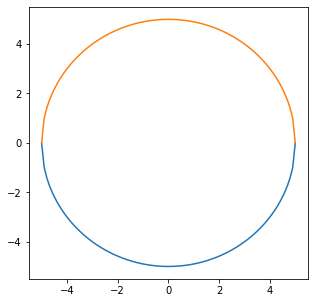

In [16]:
plt.figure(figsize=(5, 5))
plt.plot(xs, ys[0])
plt.plot(xs, ys[1])

# 2) Ugly expressions make our life harder

In [17]:
eq = sp.Eq((1 / 2) * sp.tan(x) * sp.cos(x), 2 * x**2 * (1 / (x * 4)))
eq

Eq(0.5*cos(x)*tan(x), x/2)

<font size="3" color="mediumblue">This does not look familiar at first glance...</font>

In [18]:
eq = sp.simplify(eq)
eq

Eq(x/2, 0.5*sin(x))

<font size="3" color="mediumblue">... but this does! Although for some reason SymPy didn't get rid of the 0.5 factor. Anyway by seeing this in simpler form, we might be able to make use of some properties we wouldn't be able to utilize otherwise, like</font>

$sin(x) \approx x$ when x is small.

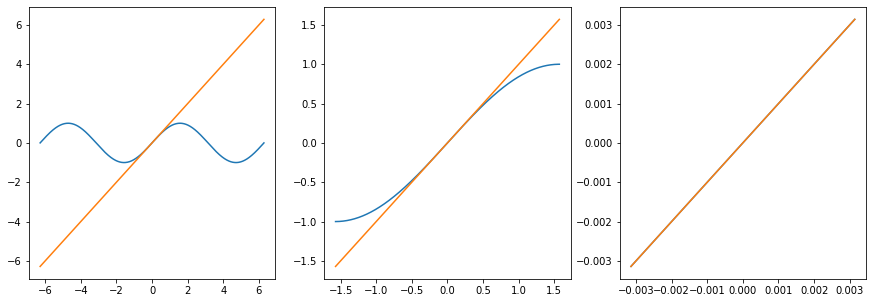

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

xs1 = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
xs2 = np.linspace(-0.5 * np.pi, 0.5 * np.pi, 1000)
xs3 = np.linspace(-0.001 * np.pi, 0.001 * np.pi, 1000)

axs[0].plot(xs1, np.sin(xs1), xs1, xs1)
axs[1].plot(xs2, np.sin(xs2), xs2, xs2)
axs[2].plot(xs3, np.sin(xs3), xs3, xs3)

# 3) Vectors & matrices

In [20]:
w1, w2, w3, w4, w5, w6, w7, w8 = sp.symbols("w1 w2 w3 w4 w5 w6 w7 w8")
x1, x2 = sp.symbols("x1 x2")

In [21]:
v = sp.Matrix([x1, x2])
v

Matrix([
[x1],
[x2]])

In [22]:
v.shape

(2, 1)

In [23]:
M = sp.Matrix([[w1, w2], [w3, w4], [w5, w6], [w7, w8]])
M

Matrix([
[w1, w2],
[w3, w4],
[w5, w6],
[w7, w8]])

In [24]:
M.shape

(4, 2)

In [25]:
M * v

Matrix([
[w1*x1 + w2*x2],
[w3*x1 + w4*x2],
[w5*x1 + w6*x2],
[w7*x1 + w8*x2]])

In [26]:
(M * v).shape

(4, 1)

<font size="3" color="mediumblue"><b>Hey!</b> Isn't this how neural networks work?</font>

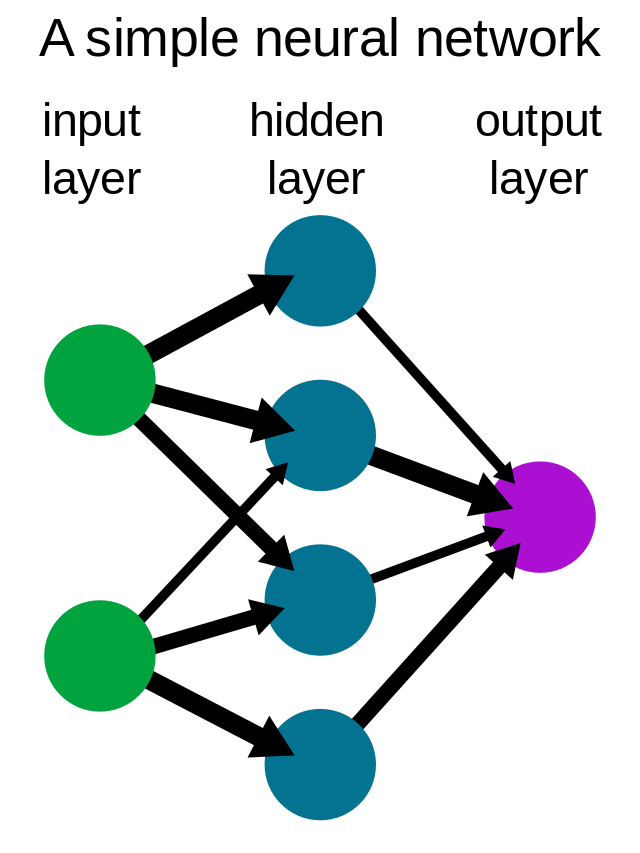

<font size="2">https://en.wikipedia.org/wiki/Neural_network</font>

<font size="3" color="mediumblue"><b>Exercise:</b> try using SymPy to derive backpropagation for NNs with ReLu, sigmoid and tanh activation functions :)</font>

# 4) Calculus

<font size="3" color="mediumblue"><b>Quick recap from 1st year at university - what is a derivative?</b> It's the slope of a tangent line at some point of the function. It gives us an idea about the increase/decrease rate.</font>

$f'(x)$ = $\lim_{h \to 0} \frac{f(x + h) - f(x)} {h}$

<font size="3" color="mediumblue">In one of our projects we used <i>symmetric mean absolute error</i> which we define as:</font>

$ SMAE = \frac {1} {n} \sum_{1}^{n} \frac {\lvert truth_{n} - pred_{n} \rvert} {truth_{n} + pred_{n}} $

<font size="3" color="mediumblue">For simplicity, let us consider an individual contribution (a single prediction for some label).</font>

In [27]:
def sae(truth, pred):
    return np.abs(truth - pred) / (truth + pred)

Text(0.5, 0, 'Prediction (truth: 100K)')

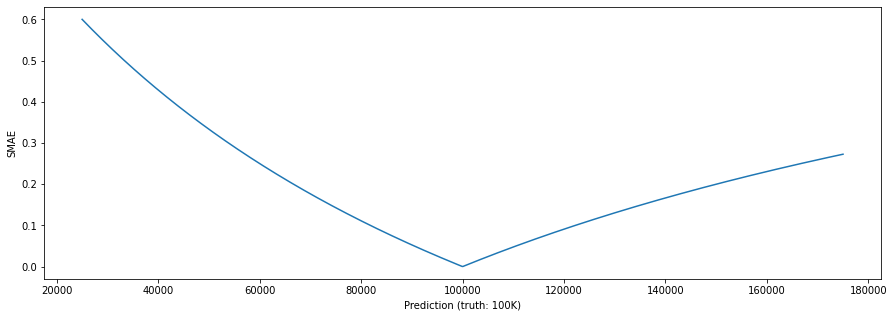

In [28]:
truth = 100_000  # some arbitrary "truth" value
pred = np.linspace(25_000, 175_000, 1000)

plt.figure(figsize=(15, 5))
plt.plot(pred, sae(truth, pred))
plt.ylabel("SMAE")
plt.xlabel("Prediction (truth: 100K)")

<font size="3" color="mediumblue"><b>Say we want to train a LGBMClassifier with a custom objective function of this form:</b></font>
https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html

<font size="3" color="mediumblue">The docs tell us to calculate the gradient (first order derivative) and hessian (second order derivative) with respect to pred:</font>

$\frac{d}{dpred} (\frac {\lvert truth - pred \rvert} {truth + pred}) =
\begin{cases}
  \frac{d}{dpred} (\frac {truth - pred} {truth + pred})  & truth >= pred \\
  \frac{d}{dpred} (\frac {pred - truth} {truth + pred})  & truth < pred
\end{cases}$

<font size="3" color="mediumblue">We can calculate this by hand, e.g. for the first branch. Let's use <b>p</b> for pred and <b>t</b> for truth:</font>

$ \frac{d}{dp} (\frac {t - p} {t + p}) = \frac{d}{dp} (t - p)(t+p)^{-1} = - \frac {(t + p)\frac{d}{dp} (t - p) + (t - p) \frac{d}{dp} (t + p)}{(t + p)^{2}} = \frac {(x + t) + (-x + t)} {(t + p)^{2}} = - \frac {2t} {(t + p)^{2}} $

<font size="3" color="mediumblue">Second branch:</font>

$ \frac{d}{dp} (\frac {p - t} {t + p}) = \frac {2t} {(t + p)^{2}} $

<font size="3" color="mediumblue">And yet we still have to calculate this:</font>

$\frac {d^{2}} {dp^{2}} f(p)$ ...

<font size="3" color="mediumblue">This is tedious to do by hand and it's easy to make a mistake. Let's use SymPy.</font>

In [29]:
t, p = sp.symbols("t p")

In [30]:
sae = sp.Abs(t - p) / (t + p)
sae

Abs(p - t)/(p + t)

In [31]:
sp.diff(sae, p)

-Abs(p - t)/(p + t)**2 + ((re(p) - re(t))*Derivative(re(p), p) + (im(p) - im(t))*Derivative(im(p), p))*sign(p - t)/((p - t)*(p + t))

<font size="3" color="mediumblue">Ouch, this does not look good. Let's use our common sense and split the problem into branches like we did before.</font>

In [32]:
gradient_sae_branch_1 = sp.diff((t - p) / (t + p), p)
gradient_sae_branch_1

-(-p + t)/(p + t)**2 - 1/(p + t)

In [33]:
gradient_sae_branch_1 = sp.simplify(gradient_sae_branch_1)
gradient_sae_branch_1

-2*t/(p + t)**2

<font size="3" color="mediumblue">This is the same result we got when doing this manually :) To calculate the 2nd order derivative, we only have to run one additional line:</font>

In [34]:
sp.simplify(sp.diff(gradient_sae_branch_1, p))

4*t/(p + t)**3

<font size="3" color="mediumblue">What's left is to do this for the other branch and combine the results.</font>

# 5) "Real life" example ;)

<font size="3" color="mediumblue">Say Bartek's preparing for a run and he needs to get rid of some weight. He wants to visualize a curve that will show him how his weight will change given a daily calorie intake and his activity. How can he do this? He found this formula online:</font>

$ BMR = 66 + 13.7 \cdot weight_{kg} + 5 \cdot height_{cm}  - 6.76 \cdot age_{years} $

<font size="3" color="mediumblue">Let's asume assume 1kg is 7000 kcal. It might be tempting to subtract the BMR at his initial weight as well as kcal from activities from his daily intake and divide by 7000 to see how many kg he loses per day... <b>but note that as his mass constantly changes, so does his BMR!</b></font>

In [35]:
height = 188
age = 32  # to be precise, this also changes if we look at a longer timeframe, but keep it constant for simplicity

intake, activity, t, C1 = sp.symbols("intake activity t C1")
w = sp.Function("w")(t)

bmr = 66 + 13.7 * w + 5 * height - 6.76 * age
bmr

13.7*w(t) + 789.68

<font size="3" color="mediumblue">So we know that 1 kg <-> 7000 kcal. Let's write a differential equation to represent weight loss:</font>

In [36]:
diff_eq = sp.Eq(sp.Derivative(w), (intake - (13.7 * w + 789.68) - activity) / 7000)
diff_eq

Eq(Derivative(w(t), t), -activity/7000 + intake/7000 - 0.00195714285714286*w(t) - 0.112811428571429)

In [37]:
res_t = sp.dsolve(diff_eq)
res_t

Eq(w(t), C1*exp(-0.00195714285714286*t) - 0.0729927007299269*activity + 0.0729927007299269*intake - 57.6408759124089)

<font size="3" color="mediumblue">What is C1? Well, Bartek has some mass in the beginning... say it's 90 kg ;)</font>

In [38]:
res_t0 = res_t.subs(t, 0)
res_t0

Eq(w(0), C1 - 0.0729927007299269*activity + 0.0729927007299269*intake - 57.6408759124089)

In [39]:
res_t0 = sp.Eq(res_t0.rhs, 90)
res_t0

Eq(C1 - 0.0729927007299269*activity + 0.0729927007299269*intake - 57.6408759124089, 90)

In [40]:
C1_fun_symbolic = sp.solve(res_t0, C1)
C1_fun_symbolic = C1_fun_symbolic[0]
C1_fun_symbolic

0.0729927007299269*activity - 0.0729927007299269*intake + 147.640875912409

<font size="3" color="mediumblue">Now all that's left is to plug in the calculated C1 coefficient to obtain the full equation:</font>

In [41]:
res_t_full = res_t.rhs.subs(C1, C1_fun_symbolic)
res_t_full

-0.0729927007299269*activity + 0.0729927007299269*intake + (0.0729927007299269*activity - 0.0729927007299269*intake + 147.640875912409)*exp(-0.00195714285714286*t) - 57.6408759124089

In [42]:
weight_loss = sp.lambdify([t, intake, activity], res_t_full)

In [43]:
t = np.linspace(0, 365, 366)

intake = 2000
activity = 500

w = weight_loss(t, intake, activity)

Text(0, 0.5, 'Weight')

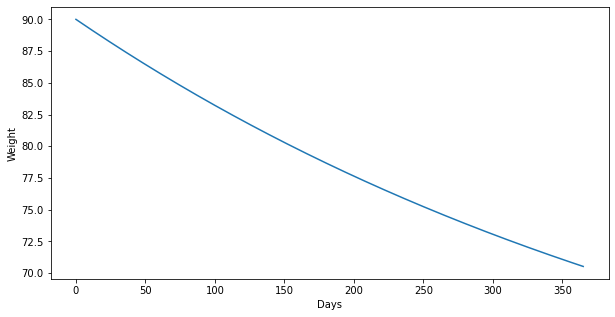

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(t, w)
plt.xlabel("Days")
plt.ylabel("Weight")